In [1]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")
%matplotlib inline

In [2]:
movies = pd.read_csv('C:/Users/MAURICIO/Desktop/Peliculas.csv',encoding='utf-8')

In [3]:
movies.head()                                               ## Five first elements

,movie_title,title_year,color,aspect_ratio,duration,language,country,duration.1,genres,content_rating,plot_keywords,director_name,actor_1_name,actor_2_name,actor_3_name,cast_total_facebook_likes,budget,imdb_score,gross
0,Avatar,2009.0,Color,1.78,178.0,English,USA,178.0,Action|Adventure|Fantasy|Sci-Fi,PG-13,avatar|future|marine|native|paraplegic,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,4834,237000000.0,7.9,760505847.0
1,Pirates of the Caribbean: At World's End,2007.0,Color,2.35,169.0,English,USA,169.0,Action|Adventure|Fantasy,PG-13,goddess|marriage ceremony|marriage proposal|pi...,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,48350,300000000.0,7.1,309404152.0
2,Spectre,2015.0,Color,2.35,148.0,English,UK,148.0,Action|Adventure|Thriller,PG-13,bomb|espionage|sequel|spy|terrorist,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,11700,245000000.0,6.8,200074175.0
3,The Dark Knight Rises,2012.0,Color,2.35,164.0,English,USA,164.0,Action|Thriller,PG-13,deception|imprisonment|lawlessness|police offi...,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,106759,250000000.0,8.5,448130642.0
4,Star Wars: Episode VII - The Force Awakens ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Documentary,NaN,NaN,Doug Walker,Doug Walker,Rob Walker,NaN,143,NaN,7.1,NaN


In [4]:
movies.shape                                            ## Size of the data

(5043, 19)

In [5]:
movies.columns                                          ## Show Columns

Index(['movie_title', 'title_year', 'color', 'aspect_ratio', 'duration',
       'language', 'country', 'duration.1', 'genres', 'content_rating',
       'plot_keywords', 'director_name', 'actor_1_name', 'actor_2_name',
       'actor_3_name', 'cast_total_facebook_likes', 'budget', 'imdb_score',
       'gross'],
      dtype='object')

In [6]:
movies.index                                            ## Show Index

RangeIndex(start=0, stop=5043, step=1)

In [7]:
c1 = movies['movie_title']                              ## Work with just one column

In [8]:
r1 = movies.loc[10,:]                                   ## Work with just one row              

In [9]:
movies.info()                                           ## Amount of elements different to zero

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 19 columns):
movie_title                  5043 non-null object
title_year                   4935 non-null float64
color                        5024 non-null object
aspect_ratio                 4714 non-null float64
duration                     5028 non-null float64
language                     5031 non-null object
country                      5038 non-null object
duration.1                   5028 non-null float64
genres                       5043 non-null object
content_rating               4740 non-null object
plot_keywords                4890 non-null object
director_name                4939 non-null object
actor_1_name                 5036 non-null object
actor_2_name                 5030 non-null object
actor_3_name                 5020 non-null object
cast_total_facebook_likes    5043 non-null int64
budget                       4551 non-null float64
imdb_score                   5043 non-n

In [10]:
movies.dtypes                                                    ## Type of elements of each column

movie_title                   object
title_year                   float64
color                         object
aspect_ratio                 float64
duration                     float64
language                      object
country                       object
duration.1                   float64
genres                        object
content_rating                object
plot_keywords                 object
director_name                 object
actor_1_name                  object
actor_2_name                  object
actor_3_name                  object
cast_total_facebook_likes      int64
budget                       float64
imdb_score                   float64
gross                        float64
dtype: object

In [11]:
(movies.dtypes == 'float64') | (movies.dtypes == 'int64')                          ## Number type

movie_title                  False
title_year                    True
color                        False
aspect_ratio                  True
duration                      True
language                     False
country                      False
duration.1                    True
genres                       False
content_rating               False
plot_keywords                False
director_name                False
actor_1_name                 False
actor_2_name                 False
actor_3_name                 False
cast_total_facebook_likes     True
budget                        True
imdb_score                    True
gross                         True
dtype: bool

In [12]:
movies.dtypes == 'object'                                                        ## Object type

movie_title                   True
title_year                   False
color                         True
aspect_ratio                 False
duration                     False
language                      True
country                       True
duration.1                   False
genres                        True
content_rating                True
plot_keywords                 True
director_name                 True
actor_1_name                  True
actor_2_name                  True
actor_3_name                  True
cast_total_facebook_likes    False
budget                       False
imdb_score                   False
gross                        False
dtype: bool

In [13]:
num_cols = [i for i in range(len(movies.dtypes)) if movies.dtypes[i] != 'object']          
num_cols                                            ## Substracting the indexes of movies types which are numbers

[1, 3, 4, 7, 15, 16, 17, 18]

In [14]:
num_col = [movies.columns[j] for j in num_cols]
num_col                                             ## Taking the categories

['title_year',
 'aspect_ratio',
 'duration',
 'duration.1',
 'cast_total_facebook_likes',
 'budget',
 'imdb_score',
 'gross']

In [15]:
obj_cols = [i for i in range(len(movies.dtypes)) if movies.dtypes[i] == object]
obj_cols                                            ## Substracting the indexes of movies types which are object

[0, 2, 5, 6, 8, 9, 10, 11, 12, 13, 14]

In [16]:
obj_col = [movies.columns[j] for j in obj_cols]
obj_col                                             ## Taking the categories

['movie_title',
 'color',
 'language',
 'country',
 'genres',
 'content_rating',
 'plot_keywords',
 'director_name',
 'actor_1_name',
 'actor_2_name',
 'actor_3_name']

In [17]:
movies_num = movies[num_col]

In [18]:
movies_num.describe()                                               ## Statistics about these columns

,title_year,aspect_ratio,duration,duration.1,cast_total_facebook_likes,budget,imdb_score,gross
count,4935.000000,4714.000000,5028.000000,5028.000000,5043.000000,4.551000e+03,5043.000000,4.159000e+03
mean,2002.470517,2.220403,107.201074,107.201074,9699.063851,3.975262e+07,6.442138,4.846841e+07
std,12.474599,1.385113,25.197441,25.197441,18163.799124,2.061149e+08,1.125116,6.845299e+07
min,1916.000000,1.180000,7.000000,7.000000,0.000000,2.180000e+02,1.600000,1.620000e+02
25%,1999.000000,1.850000,93.000000,93.000000,1411.000000,6.000000e+06,5.800000,5.340988e+06
50%,2005.000000,2.350000,103.000000,103.000000,3090.000000,2.000000e+07,6.600000,2.551750e+07
75%,2011.000000,2.350000,118.000000,118.000000,13756.500000,4.500000e+07,7.200000,6.230944e+07
max,2016.000000,16.000000,511.000000,511.000000,656730.000000,1.221550e+10,9.500000,7.605058e+08


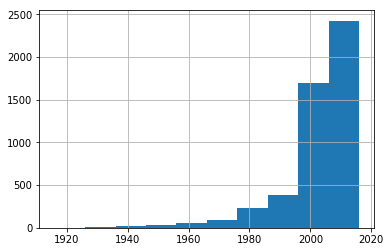

In [19]:
movies_num['title_year'].hist()

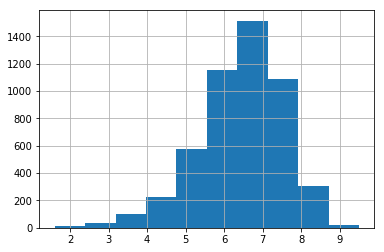

In [20]:
movies_num['imdb_score'].hist()

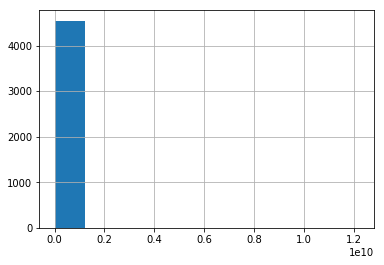

In [21]:
movies_num['budget'].hist()

In [22]:
mask = (movies_num['budget'] > 1e9)

In [23]:
movies[mask]

,movie_title,title_year,color,aspect_ratio,duration,language,country,duration.1,genres,content_rating,plot_keywords,director_name,actor_1_name,actor_2_name,actor_3_name,cast_total_facebook_likes,budget,imdb_score,gross
2323,Princess Mononoke,1997.0,Color,1.85,134.0,Japanese,Japan,134.0,Adventure|Animation|Fantasy,PG-13,anime|cult film|forest|princess|studio ghibli,Hayao Miyazaki,Minnie Driver,Jada Pinkett Smith,Billy Crudup,2710,2.400000e+09,8.4,2298191.0
2334,Steamboy,2004.0,Color,1.85,103.0,Japanese,Japan,103.0,Action|Adventure|Animation|Family|Sci-Fi|Thriller,PG-13,19th century|ball|boy|inventor|steam,Katsuhiro Ôtomo,William Hootkins,Robin Atkin Downes,Rosalind Ayres,991,2.127520e+09,6.9,410388.0
2988,The Host,2006.0,Color,1.85,110.0,Korean,South Korea,110.0,Comedy|Drama|Horror|Sci-Fi,R,daughter|han river|monster|river|seoul,Joon-ho Bong,Doona Bae,Kang-ho Song,Ah-sung Ko,1173,1.221550e+10,7.0,2201412.0
3005,Fateless,2005.0,Color,2.35,134.0,Hungarian,Hungary,134.0,Drama|Romance|War,R,bus|death|gay slur|hatred|jewish,Lajos Koltai,Marcell Nagy,Péter Fancsikai,Bálint Péntek,11,2.500000e+09,7.1,195888.0
3423,Akira,1988.0,Color,1.85,124.0,Japanese,Japan,124.0,Action|Animation|Sci-Fi,R,based on manga|biker gang|gifted child|post th...,Katsuhiro Ôtomo,Mitsuo Iwata,Takeshi Kusao,Tesshô Genda,28,1.100000e+09,8.1,439162.0
3859,Lady Vengeance,2005.0,Color,2.35,112.0,Korean,South Korea,112.0,Crime|Drama,R,cake|christian|lesbian sex|oral sex|pregnant s...,Chan-wook Park,Min-sik Choi,Yeong-ae Lee,Hye-jeong Kang,907,4.200000e+09,7.7,211667.0


In [24]:
financials = pd.read_csv('C:/Users/MAURICIO/Desktop/thenumbers.csv',encoding='utf-8')               ## New data set
financials.shape

(4341, 8)

In [25]:
f = financials[['movie_title','production_budget','worldwide_gross']]

In [26]:
f.shape

(4341, 3)

In [27]:
m_n = pd.concat([movies['movie_title'],movies_num],axis=1)                              ## Concatenation

In [28]:
movies_v2 = pd.merge(f,m_n,on='movie_title',how='left')                                 ## Merge
movies_v2.shape

(4385, 11)

In [29]:
movies_v2

,movie_title,production_budget,worldwide_gross,title_year,aspect_ratio,duration,duration.1,cast_total_facebook_likes,budget,imdb_score,gross
0,Avatar,425000000,2783918982,2009.0,1.78,178.0,178.0,4834,237000000.0,7.9,760505847.0
1,Star Wars: Episode VII - The Force Awakens ...,306000000,2058662225,NaN,NaN,NaN,NaN,143,NaN,7.1,NaN
2,Pirates of the Caribbean: At World's End,300000000,963420425,2007.0,2.35,169.0,169.0,48350,300000000.0,7.1,309404152.0
3,Spectre,300000000,879620923,2015.0,2.35,148.0,148.0,11700,245000000.0,6.8,200074175.0
4,The Dark Knight Rises,275000000,1084439099,2012.0,2.35,164.0,164.0,106759,250000000.0,8.5,448130642.0
5,The Lone Ranger,275000000,260002115,2013.0,2.35,150.0,150.0,45757,215000000.0,6.5,89289910.0
6,John Carter,275000000,282778100,2012.0,2.35,132.0,132.0,1873,263700000.0,6.6,73058679.0
7,Tangled,260000000,586581936,2010.0,1.85,100.0,100.0,2036,260000000.0,7.8,200807262.0
8,Spider-Man 3,258000000,890875303,2007.0,2.35,156.0,156.0,46055,258000000.0,6.2,336530303.0
9,Spider-Man 3,258000000,890875303,2007.0,2.35,156.0,156.0,46055,258000000.0,6.2,336530303.0


In [30]:
## Missing Data

In [31]:
movies_v2.notnull().apply(pd.Series.value_counts)               ## not null: missing data
                                                                ## value counts: count the values with some specific condition

,movie_title,production_budget,worldwide_gross,title_year,aspect_ratio,duration,duration.1,cast_total_facebook_likes,budget,imdb_score,gross
False,NaN,NaN,NaN,27,274,13,13,NaN,335,NaN,671
True,4385.0,4385.0,4385.0,4358,4111,4372,4372,4385.0,4050,4385.0,3714


In [32]:
(movies_v2 != 0).apply(pd.Series.value_counts)                 ## Data different to zero

,movie_title,production_budget,worldwide_gross,title_year,aspect_ratio,duration,duration.1,cast_total_facebook_likes,budget,imdb_score,gross
False,NaN,NaN,281,NaN,NaN,NaN,NaN,27,NaN,NaN,NaN
True,4385.0,4385.0,4104,4385.0,4385.0,4385.0,4385.0,4358,4385.0,4385.0,4385.0


In [33]:
available = ((movies_v2 != 0) & (movies_v2.notnull()))                   ## Both Conditions

In [34]:
available.all(axis=1).value_counts()

True     3408
False     977
dtype: int64

In [35]:
mask = available['worldwide_gross']                                        
movies_v2 = movies_v2[mask]                                                   ## Movies_v2 es solo los datos que estan.
movies_v2.shape                                                               ## 4104 data available about worldwide_gross

(4104, 11)

In [36]:
((movies_v2 != 0) & (movies_v2.notnull())).worldwide_gross.value_counts()         ## Not missing or null data

True    4104
Name: worldwide_gross, dtype: int64

In [37]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')                   ## Fill the data missing with the mean

In [38]:
movies_v2 = movies_v2.drop('movie_title',axis=1)
movies_v2 = movies_v2.drop('duration',axis=1)

In [39]:
movies_v2.head()

,production_budget,worldwide_gross,title_year,aspect_ratio,duration.1,cast_total_facebook_likes,budget,imdb_score,gross
0,425000000,2783918982,2009.0,1.78,178.0,4834,237000000.0,7.9,760505847.0
1,306000000,2058662225,NaN,NaN,NaN,143,NaN,7.1,NaN
2,300000000,963420425,2007.0,2.35,169.0,48350,300000000.0,7.1,309404152.0
3,300000000,879620923,2015.0,2.35,148.0,11700,245000000.0,6.8,200074175.0
4,275000000,1084439099,2012.0,2.35,164.0,106759,250000000.0,8.5,448130642.0


In [40]:
movies_v2.values                                                       ## Values movies

array([[4.25000000e+08, 2.78391898e+09, 2.00900000e+03, ...,
        2.37000000e+08, 7.90000000e+00, 7.60505847e+08],
       [3.06000000e+08, 2.05866222e+09,            nan, ...,
                   nan, 7.10000000e+00,            nan],
       [3.00000000e+08, 9.63420425e+08, 2.00700000e+03, ...,
        3.00000000e+08, 7.10000000e+00, 3.09404152e+08],
       ...,
       [7.00000000e+03, 9.00000000e+02, 2.00500000e+03, ...,
        3.25000000e+03, 7.80000000e+00,            nan],
       [3.96700000e+03, 1.04430000e+04, 2.01200000e+03, ...,
                   nan, 6.30000000e+00, 1.04430000e+04],
       [1.10000000e+03, 1.81041000e+05, 2.00400000e+03, ...,
        1.10000000e+03, 6.60000000e+00, 8.52220000e+04]])

In [41]:
values = imputer.fit_transform(movies_v2)                             ## Values movies fixed

In [42]:
values

array([[4.25000000e+08, 2.78391898e+09, 2.00900000e+03, ...,
        2.37000000e+08, 7.90000000e+00, 7.60505847e+08],
       [3.06000000e+08, 2.05866222e+09, 2.00213073e+03, ...,
        4.04553863e+07, 7.10000000e+00, 4.83193329e+07],
       [3.00000000e+08, 9.63420425e+08, 2.00700000e+03, ...,
        3.00000000e+08, 7.10000000e+00, 3.09404152e+08],
       ...,
       [7.00000000e+03, 9.00000000e+02, 2.00500000e+03, ...,
        3.25000000e+03, 7.80000000e+00, 4.83193329e+07],
       [3.96700000e+03, 1.04430000e+04, 2.01200000e+03, ...,
        4.04553863e+07, 6.30000000e+00, 1.04430000e+04],
       [1.10000000e+03, 1.81041000e+05, 2.00400000e+03, ...,
        1.10000000e+03, 6.60000000e+00, 8.52220000e+04]])

In [43]:
X = pd.DataFrame(values)                                     ## Creating the dataframe
X.columns = movies_v2.columns                                ## Creating columns 
X.index = movies_v2.index                                    ## Creating rows
X.head()
print(len(X))

4104


In [44]:
X.to_csv('C:/Users/MAURICIO/Desktop/First_Result.csv',index=False)                ## Saving the data

In [45]:
x = pd.read_csv('C:/Users/MAURICIO/Desktop/First_Result.csv',encoding='utf-8')    ## Reading data
x = x.drop(['gross'], axis=1)      

In [46]:
y = x['worldwide_gross']                                                      ## money to gain

In [47]:
x = x.drop(['worldwide_gross'], axis=1)                                         ## It is because that is what I want to predict

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.4,random_state=1)     ## Spliting the data in test and train (60% Training-40% Test)
print(len(x))
print(len(x_train))
print(len(x_test))                                                           

4104
2462
1642


In [49]:
model = Lasso()
model.fit(x_train,y_train)                                                   ## Training part

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [50]:
predicted = model.predict(x_test)                                            ## Making the prediction 

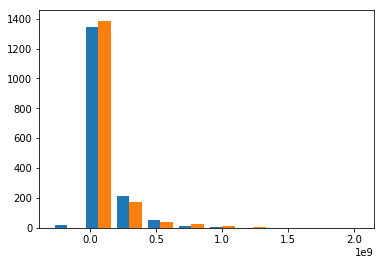

In [51]:
plt.hist([predicted,y_test]);                                                ## Comparation

In [52]:
model.score(x_test,y_test)

0.5803597861019067

In [53]:
residuals = y_test - predicted                                                ## Errors 

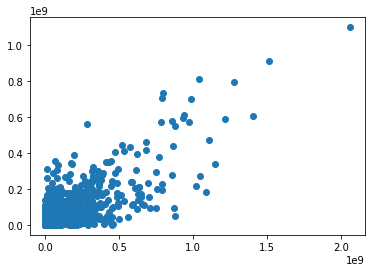

In [54]:
plt.scatter(y_test,np.abs(residuals))

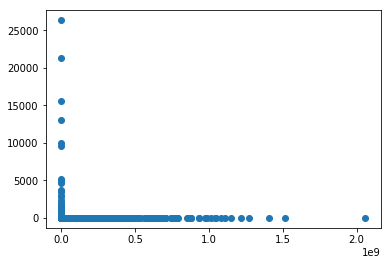

In [55]:
ab_residuals = np.abs(residuals) / y_test                                    ## Percentage
plt.scatter(y_test,ab_residuals)

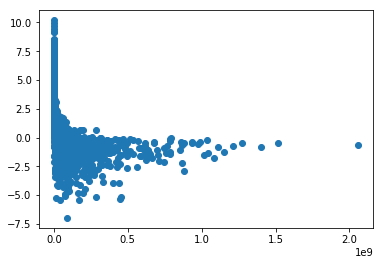

In [56]:
lab_residuals = np.log(ab_residuals)
plt.scatter(y_test,lab_residuals)

In [57]:
x.corr()                                                                   ## Correlation between variables

,production_budget,title_year,aspect_ratio,duration.1,cast_total_facebook_likes,budget,imdb_score
production_budget,1.000000,0.207884,0.077459,0.276407,0.236820,0.185357,0.033154
title_year,0.207884,1.000000,0.130532,-0.137662,0.124693,0.048664,-0.178685
aspect_ratio,0.077459,0.130532,1.000000,-0.012645,0.020656,0.011340,0.037765
duration.1,0.276407,-0.137662,-0.012645,1.000000,0.121918,0.064252,0.315642
cast_total_facebook_likes,0.236820,0.124693,0.020656,0.121918,1.000000,0.032591,0.096663
budget,0.185357,0.048664,0.011340,0.064252,0.032591,1.000000,0.019417
imdb_score,0.033154,-0.178685,0.037765,0.315642,0.096663,0.019417,1.000000


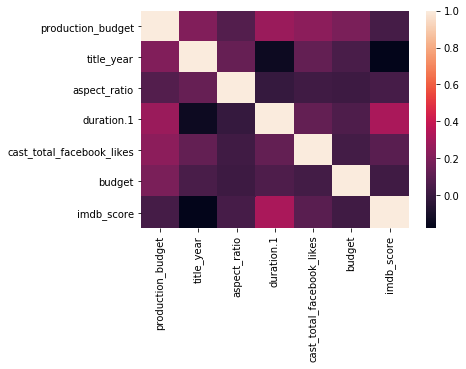

In [58]:
%matplotlib inline 
sb.heatmap(x.corr())

In [59]:
model.coef_

array([ 3.12003911e+00, -4.99778669e+04, -6.71094346e+06,  1.57588945e+04,
        1.31241668e+02, -3.71661997e-02,  2.39866023e+07])

In [60]:
len(model.coef_)
print(x.columns)

Index(['production_budget', 'title_year', 'aspect_ratio', 'duration.1',
       'cast_total_facebook_likes', 'budget', 'imdb_score'],
      dtype='object')


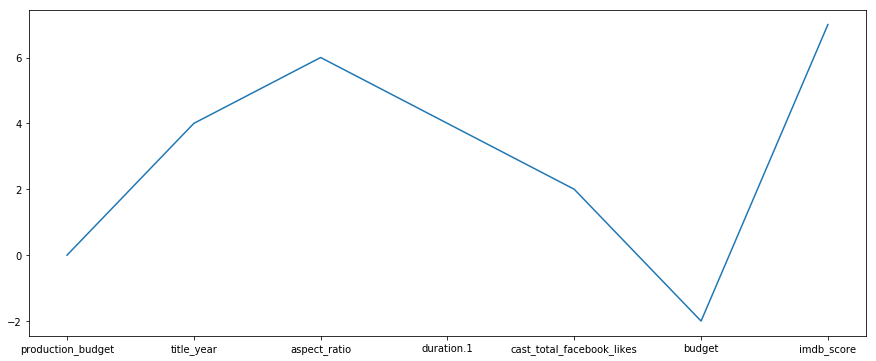

In [61]:
var = np.floor(np.log10(np.abs(model.coef_)))                                           ## Entire part
plt.figure(figsize=(15,6))
plt.plot(x.columns,var)

In [62]:
## Let´s do it by default

In [63]:
xx_train, xx_test, yy_train, yy_test = train_test_split(x,y)

In [64]:
len(xx_train)/len(x)

0.75

In [65]:
model.fit(xx_train,yy_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [66]:
model.score(xx_test,yy_test)

0.5805371653886567

In [67]:
model.coef_

array([ 3.18316670e+00, -9.45923291e+04, -7.87191290e+06, -7.57175933e+04,
        3.39094459e+02, -5.23349772e-02,  2.64974724e+07])

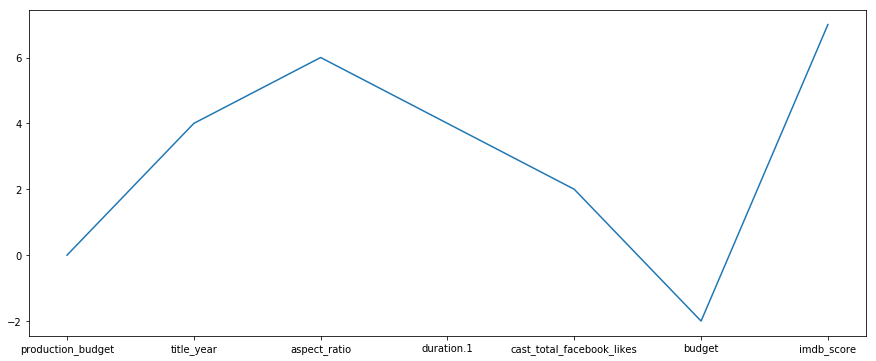

In [68]:
var_ = np.floor(np.log10(np.abs(model.coef_)))
plt.figure(figsize=(15,6))
plt.plot(x.columns,var_)

In [69]:
## Correlation between variables

z = pd.concat([x,y],axis=1)
sb.pairplot(z)

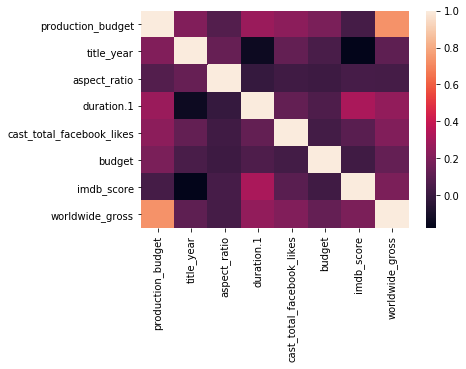

In [70]:
z = pd.concat([x,y],axis=1)
sb.heatmap(z.corr())

In [71]:
selector = SelectKBest(mutual_info_regression, k=4)                               ## Select the best feautures
selector.fit(x,y)

SelectKBest(k=4,
      score_func=<function mutual_info_regression at 0x0000020BCC3A02F0>)

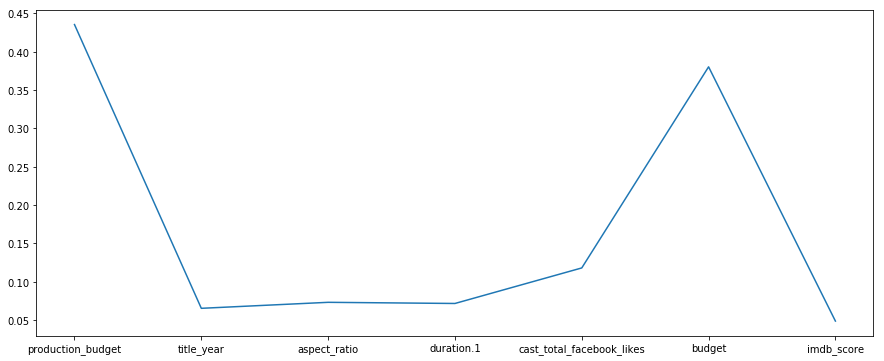

In [72]:
scores = selector.scores_
plt.figure(figsize=(15,6))
plt.plot(x.columns,scores)

In [73]:
## Create 3 different models reducing the features to visualize the changings

In [74]:
x_2 = x[['production_budget','title_year','duration.1','cast_total_facebook_likes','imdb_score']]
x_3 = x[['production_budget','cast_total_facebook_likes','imdb_score']]
x_4 = x[['production_budget','cast_total_facebook_likes','budget']]

In [75]:
c2 = ['production_budget','title_year','duration.1','cast_total_facebook_likes','imdb_score']
x2_train, x2_test, y2_train, y2_test = x_train[c2], x_test[c2], y_train, y_test

c3 = ['production_budget','cast_total_facebook_likes','imdb_score']
x3_train, x3_test, y3_train, y3_test = x_train[c3], x_test[c3], y_train, y_test

c4 = ['production_budget','cast_total_facebook_likes','budget']
x4_train, x4_test, y4_train, y4_test = x_train[c4], x_test[c4], y_train, y_test

In [76]:
model2 = Lasso()
model3 = Lasso()
model4 = Lasso()

In [77]:
model2.fit(x2_train,y2_train)
model3.fit(x3_train,y3_train)
model4.fit(x4_train,y4_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [78]:
print(model2.score(x2_test,y2_test))
print(model3.score(x3_test,y3_test))
print(model4.score(x4_test,y4_test))

0.581782745883709
0.5816672067897428
0.5440574325379691


In [79]:
## Rescale the data

In [80]:
scaler = StandardScaler()
scaler.fit(x_train)
print(scaler.mean_)                             ##   Mean
print(scaler.scale_)                            ##   Standard Desviation

[3.30371637e+07 2.00221160e+03 2.13119318e+00 1.08693933e+02
 1.04062323e+04 3.79806065e+07 6.43818034e+00]
[4.09198863e+07 1.18176818e+01 7.92388140e-01 2.30884415e+01
 1.60223410e+04 8.13666720e+07 1.07165137e+00]


In [81]:
x_train_scaled, x_test_scaled = (scaler.transform(x_train), scaler.transform(x_test))      ## Rescale the data

In [82]:
model_scaled = Lasso()
model_scaled.fit(x_train_scaled,y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [83]:
print(model.score(x_test,y_test))
print(model_scaled.score(x_test_scaled,y_test))

0.5779461855840222
0.5803597897012915


In [85]:
model_scaled = make_pipeline(StandardScaler(),Lasso())                                ## Faster method
model_scaled.fit(x_train,y_train)
print(model_scaled.score(x_test,y_test))

0.5803597897012915
